# Chapter 2 Filtering and Sorting

# Fictional Army

### Introduction:

This exercise was inspired by this [page](http://chrisalbon.com/python/)

Special thanks to: https://github.com/chrisalbon for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. This is the data given as a dictionary

In [ ]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

### Step 3. Create a dataframe and assign it to a variable called army. 

#### Don't forget to include the columns names in the order presented in the dictionary ('regiment', 'company', 'deaths'...) so that the column index order is consistent with the solutions. If omitted, pandas will order the columns alphabetically.

In [ ]:
army = pd.DataFrame(raw_data, columns=list(raw_data.keys()))
army

### Step 4. Set the 'origin' colum as the index of the dataframe

In [ ]:
army = army.set_index('origin')
army

### Step 5. Print only the column veterans

In [ ]:
army.veterans

### Step 6. Print the columns 'veterans' and 'deaths'

In [ ]:
army[['veterans', 'deaths']]

### Step 7. Print the name of all the columns.

In [ ]:
army.columns

### Step 8. Select the 'deaths', 'size' and 'deserters' columns from Maine and Alaska

In [ ]:
army.loc[['Maine', 'Alaska'], ['deaths', 'size', 'deserters']]

### Step 9. Select the rows 3 to 7 and the columns 3 to 6

In [ ]:
army.iloc[3:7, 3:6]

### Step 10. Select every row after the fourth row

In [ ]:
army.iloc[3:]

### Step 11. Select every row up to the 4th row

In [ ]:
army.iloc[:4]

### Step 12. Select the 3rd column up to the 7th column

In [ ]:
army.iloc[:, 3:8]

### Step 13. Select rows where df.deaths is greater than 50

In [ ]:
army[army.deaths > 50]

### Step 14. Select rows where df.deaths is greater than 500 or less than 50

In [ ]:
army[(army.deaths > 500) | (army.deaths < 50)]

### Step 15. Select all the regiments not named "Dragoons"

In [ ]:
army[army.regiment != 'Dragoons']

### Step 16. Select the rows called Texas and Arizona

In [ ]:
army.loc[['Texas', 'Arizona'],]

### Step 17. Select the third cell in the row named Arizona

In [ ]:
army.loc[['Arizona'], army.columns[2]]

In [ ]:
army.iloc[army.index.get_loc('Arizona'), 2]

### Step 18. Select the third cell down in the column named deaths

In [ ]:
army.loc[army.index[2], 'deaths']

In [ ]:
army.iloc[[2], army.columns.get_loc('deaths')]

# Chapter 3 - Grouping

# Ex - GroupBy

### Introduction:

GroupBy can be summarizes as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [ ]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks

### Step 4. Which continent drinks more beer on average?

In [ ]:
drinks_continent = drinks.groupby(['continent'])
drinks_continent.mean().sort_values(['beer_servings'],ascending=False)

In [ ]:
# OR
drinks.groupby('continent').beer_servings.mean()

### Step 5. For each continent print the statistics for wine consumption.

In [ ]:
drinks_continent['wine_servings'].describe()

### Step 6. Print the mean alcoohol consumption per continent for every column

In [ ]:
drinks_continent.mean()

### Step 7. Print the median alcoohol consumption per continent for every column

In [ ]:
drinks_continent.median()

### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [ ]:
spirit_stat = pd.merge(drinks_continent['spirit_servings'].mean(), 
                       drinks_continent['spirit_servings'].min(), on='continent')
spirit_stat = pd.merge(spirit_stat, drinks_continent['spirit_servings'].max(), on='continent')
spirit_stat.columns=['spirit_mean', 'spirit_min', 'spirit_max']
spirit_stat

In [ ]:
drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max'])

# Occupation

### Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users.

In [ ]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|', index_col='user_id')
users.head()

### Step 4. Discover what is the mean age per occupation

In [ ]:
users.groupby('occupation').age.mean()

### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [ ]:
def gender_to_numeric(s):
    if s == 'M':
        return 1
    else:
        return 0

users['gender_numeric'] = users['gender'].apply(gender_to_numeric)

users.groupby('occupation')['gender_numeric'].mean().sort_values(ascending=False).apply(lambda x: x * 100)

### Step 6. For each occupation, calculate the minimum and maximum ages

In [ ]:
users.groupby('occupation')['age'].agg(['min', 'max'])

### Step 7. For each combination of occupation and gender, calculate the mean age

In [ ]:
users.groupby(['occupation', 'gender'])['age'].mean()

### Step 8.  For each occupation present the percentage of women and men

In [ ]:
def female_ratio(x):
    return (x.gender == 'F').sum() / x.shape[0]

def male_ratio(x):
    return (x.gender == 'M').sum() / x.shape[0]

users.groupby('occupation').apply(lambda x: (x.gender == 'F').sum() / x.shape[0])

In [ ]:
users.groupby('occupation').apply(lambda x: (x.gender == 'M').sum() / x.shape[0])

In [ ]:
# OR

# create a data frame and apply count to gender
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# create a DataFrame and apply count for each occupation
occup_count = users.groupby(['occupation']).agg('count')

# divide the gender_ocup per the occup_count and multiply per 100
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100

# present all rows from the 'gender column'
occup_gender.loc[: , 'gender']

# Regiment

### Introduction:

Special thanks to: http://chrisalbon.com/ for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Create the DataFrame with the following values:

In [ ]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

### Step 3. Assign it to a variable called regiment.
#### Don't forget to name each column

In [ ]:
regiment = pd.DataFrame(raw_data, columns=raw_data.keys())
regiment.index_col = 'regiment'
regiment

### Step 4. What is the mean preTestScore from the regiment Nighthawks?  

In [ ]:
regiment[regiment['regiment']=='Nighthawks'].preTestScore.mean()

### Step 5. Present general statistics by company

In [ ]:
regiment.groupby('company').describe()

### Step 6. What is the mean each company's preTestScore?

In [ ]:
regiment.groupby('company').preTestScore.mean()

### Step 7. Present the mean preTestScores grouped by regiment and company

In [ ]:
regiment.groupby(['regiment', 'company']).preTestScore.mean()

### Step 8. Present the mean preTestScores grouped by regiment and company without heirarchical indexing

In [ ]:
regiment.groupby(['regiment', 'company']).preTestScore.mean().unstack()

### Step 9. Group the entire dataframe by regiment and company

In [ ]:
regiment.groupby(['regiment', 'company']).mean()

### Step 10. What is the number of observations in each regiment and company

In [ ]:
regiment.groupby(['regiment', 'company']).size()

### Step 11. Iterate over a group and print the name and the whole data from the regiment

In [ ]:
for name, group in regiment.groupby('regiment'):
    print(name)
    print(group)

# Chapter 4 Apply

# Student Alcohol Consumption

### Introduction:

This time you will download a dataset from the UCI.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv).

### Step 3. Assign it to a variable called df.

In [ ]:
csv_url = r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'
df = pd.read_csv(csv_url)
df.head()

### Step 4. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [ ]:
df = df.loc[:, 'school':'guardian']
df.head()

### Step 5. Create a lambda function that capitalize strings.

In [ ]:
lambda x: x.capitalize()

### Step 6. Capitalize both Mjob and Fjob

In [ ]:
df[['Mjob', 'Fjob']].applymap(lambda x: x.capitalize())

### Step 7. Print the last elements of the data set.

In [ ]:
df.iloc[-1]

# OR
df.tail()

### Step 8. Did you notice the original dataframe is still lowercase? Why is that? Fix it and capitalize Mjob and Fjob.

In [ ]:
df[['Mjob', 'Fjob']] = df[['Mjob', 'Fjob']].applymap(lambda x: x.capitalize())
df.head()

# OR

# df['Mjob'] = df['Mjob'].apply(lambda x: x.capitalize())
# df['Fjob'] = df['Fjob'].apply(lambda x: x.capitalize())

### Step 9. Create a function called majority that return a boolean value to a new column called legal_drinker (Consider majority as older than 17 years old)

In [ ]:
def majority():
    df['legal_drinker'] = df.age > 17

#majority()
majority()
df.head()

### Step 10. Multiply every number of the dataset by 10. 
##### I know this makes no sense, don't forget it is just an exercise

In [ ]:
df = df.applymap(lambda x: x*10 if type(x)==int else x)
df.head()

# United States - Crime Rates - 1960 - 2014

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
from datetime import datetime

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [ ]:
crime_csv = r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv'
crime = pd.read_csv(crime_csv, sep=',')
crime.head()

### Step 4. What is the type of the columns?

In [ ]:
crime.dtypes

# OR 
crime.info()

##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [ ]:
# crime.Year = crime.Year.apply(lambda x: datetime(x, 1, 1))
crime.info()

# OR
crime.Year = pd.to_datetime(crime.Year, format='%Y')

### Step 6. Set the Year column as the index of the dataframe

In [ ]:
crime = crime.set_index('Year',drop=True)
crime

### Step 7. Delete the Total column

In [ ]:
crime.drop(['Total'],axis=1, inplace=True)

# OR
# del crime['Total']

### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [ ]:
crimes = crime.resample('10AS').sum()
population = crime.Population.resample('10AS').max()
crimes.Population = population
crimes

### Step 9. What is the mos dangerous decade to live in the US?

In [ ]:
crimes.idxmax()

# Chapter 5 Merge

## MPG Cars

### Introduction:

The following exercise utilizes data from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

### Step 2. Import the first dataset [cars1](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv) and [cars2](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv).  

   ### Step 3. Assign each to a variable called cars1 and cars2

In [ ]:
cars1 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv')
cars2 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv')
cars1.head()

### Step 4. Ops it seems our first dataset has some unnamed blank columns, fix cars1

In [ ]:
cars1.dropna(axis=1, inplace=True)

# OR
# cars1 = cars1.loc[:, 'mpg', 'car']
cars1.head()

### Step 5. What is the number of observations in each dataset?

In [ ]:
print("Number of observations in cars1: {}\nNumber of observations in cars2: {}".format(cars1.shape[0], cars2.shape[0]))

In [ ]:
cars1

In [ ]:
cars2

### Step 6. Join cars1 and cars2 into a single DataFrame called cars

In [ ]:
cars = pd.concat([cars1, cars2])

# OE
# cars = cars1.append(cars2)
cars

### Step 7. Ops there is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [ ]:
randSeries = np.random.randint(15000, 73000 + 1, cars.shape[0])
randSeries

### Step 8. Add the column owners to cars

In [ ]:
cars['owners'] = randSeries

In [ ]:
cars

# Fictitious Names

### Introduction:

This time you will create a data again 

Special thanks to [Chris Albon](http://chrisalbon.com/) for sharing the dataset and materials.
All the credits to this exercise belongs to him.  

In order to understand about it go [here](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/).

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Create the 3 DataFrames based on the followin raw data

In [ ]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [ ]:
data1 = pd.DataFrame(raw_data_1)

data2 = pd.DataFrame(raw_data_2)

data3 = pd.DataFrame(raw_data_3)

In [ ]:
data1

In [ ]:
data2

In [ ]:
data3

### Step 4. Join the two dataframes along rows and assign all_data

In [ ]:
all_data = data1.append(data2)
print(all_data.shape)
all_data

### Step 5. Join the two dataframes along columns and assing to all_data_col

In [ ]:
# all_data_col = data1.join(data2, lsuffix='_1', rsuffix='_2')

# Or
all_data_col = pd.concat([data1, data2], axis=1)
all_data_col.head()

### Step 6. Print data3

In [ ]:
data3

### Step 7. Merge all_data and data3 along the subject_id value

In [ ]:
all_data.merge(data3, on='subject_id')

### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [ ]:
pd.merge(data1, data2, on='subject_id', how='inner', suffixes=('_1', '_2'))

### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [ ]:
pd.merge(data1, data2, on='subject_id', how='outer', suffixes=('_1', '_2'))

# Housing Market

### Introduction:

This time we will create our own dataset with fictional numbers to describe a house market. As we are going to create random data don't try to reason of the numbers.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

### Step 2. Create 3 differents Series, each of length 100, as follows: 
1. The first a random number from 1 to 4 
2. The second a random number from 1 to 3
3. The third a random number from 10,000 to 30,000

In [ ]:
series1 = pd.Series(np.random.randint(1, 4 + 1, 100))
series2 = pd.Series(np.random.randint(1, 3 + 1, 100))
series3 = pd.Series(np.random.randint(10000, 30000 + 1, 100))


### Step 3. Let's create a DataFrame by joinning the Series by column

In [ ]:
df = pd.DataFrame([series1, series2, series3]).T

# OR
# df = pd.concat([series1, series2, series3], axis=1)
df

### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [ ]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# OR
# df.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
df.head()

### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [ ]:
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3]))

# OR
# bigcolumn = pd.concat([series1, series2, series3], axis=0)
# bigcolumn = bigcolumn.to_frame()
bigcolumn

### Step 6. Ops it seems it is going only until index 99. Is it true?

### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [ ]:
bigcolumn.index = [i for i in range(300)]

# OR
# bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

# Chapter 6 Stats

# US - Baby Names

### Introduction:

We are going to use a subset of [US Baby Names](https://www.kaggle.com/kaggle/us-baby-names) from Kaggle.  
In the file it will be names from 2004 until 2014


### Step 1. Import the necessary libraries

In [37]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv). 

### Step 3. Assign it to a variable called baby_names.

In [44]:
baby_names = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

### Step 4. See the first 10 entries

In [45]:
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


### Step 5. Delete the column 'Unnamed: 0' and 'Id'

In [46]:
baby_names = baby_names.loc[:, 'Name':]
print(baby_names.shape)
baby_names.head()

(1016395, 5)


,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### Step 6. Is there more male or female names in the dataset?

In [47]:
print(baby_names[baby_names.Gender=='F'].shape[0])
print(baby_names[baby_names.Gender=='M'].shape[0])

# OR
# baby_names['Gender'].value_counts()

558846
457549


### Step 7. Group the dataset by name and assign to names

In [48]:
del baby_names['Year']
names = baby_names.groupby('Name').sum()
names.sort_values('Count', ascending=False).head()

,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


### Step 8. How many different names exist in the dataset?

In [49]:
names.describe()

,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


### Step 9. What is the name with most occurrences?

In [60]:
names.sort_values('Count', ascending=False).index[0]

# OR
# names.sort_values('Count', ascending=False).Count.idxmax()

'Jacob'

### Step 10. How many different names have the least occurrences?

In [70]:
len(names[names.Count == names.Count.min()])

2578

### Step 11. What is the median name occurrence?

In [71]:
names.Count.median()

49.0

### Step 12. What is the standard deviation of names?

In [72]:
names.Count.std()

11006.069467891111

### Step 13. Get a summary with the mean, min, max, std and quartiles.

In [75]:
names.describe()

,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


# Wind Statistics

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [434]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

### Step 1. Import the necessary libraries

In [216]:
import pandas as pd
from datetime import datetime

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data)

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [217]:
data = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep=r'\s+',parse_dates=[[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [218]:
def func(date):
    from datetime import datetime
    if date.year >= 2020:
        new_date = datetime(date.year-100, date.month, date.day)
        return new_date
    return date

#data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(func)
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(func)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [219]:
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'])
data = data.set_index('Yr_Mo_Dy')
type(data.index[0])

pandas._libs.tslibs.timestamps.Timestamp

### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [172]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [233]:
data.notna().values.flatten().sum()

78857

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [225]:
data.mean().mean()

# OR
# data.fillna(0).values.flatten().mean()

10.223864592840483

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [237]:
#loc_stats = data.apply([min, max, np.mean, np.std], axis=0)
#loc_stats.head()
data.describe()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [191]:
day_stats = data.apply([min, max, np.mean, np.std], axis=1)
day_stats.head()

,min,max,mean,std
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [192]:
data[data.index.month==1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Step 12. Downsample the record to a yearly frequency for each location.

In [238]:
# data.resample('A')

data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Step 13. Downsample the record to a monthly frequency for each location.

In [201]:
data.resample('M')

### Step 14. Downsample the record to a weekly frequency for each location.

In [202]:
data.resample('W')

### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [242]:
# resample data to 'W' week and use the functions
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], :]

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

# Chapter 7 Visualization

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [243]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [250]:
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter=r'\t')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [252]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [300]:
x = chipo.item_name
counts = collections.Counter(x)
df = pd.DataFrame.from_dict(counts, orient='index')
df

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726
Side of Chips,101
Steak Burrito,368
Steak Soft Tacos,55
Chips and Guacamole,479
Chicken Crispy Tacos,47


Text(0.5, 1.0, "Chipotle's top 5 ordered items")

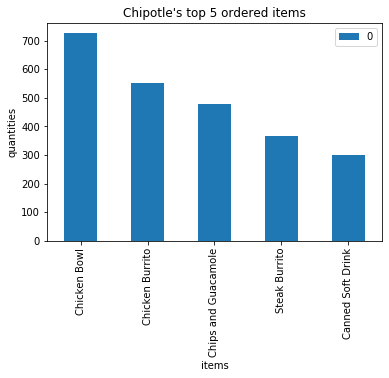

In [307]:
df.sort_values(0, ascending=False)[:5].plot(kind='bar')
plt.xlabel('items')
plt.ylabel('quantities')
plt.title('Chipotle\'s top 5 ordered items')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0, 36.715176600441495)

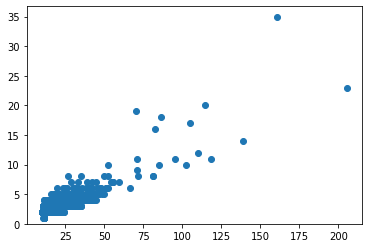

In [320]:
chipo['item_price_float'] = chipo['item_price'].apply(lambda s: float(s[1:]))
df = chipo.groupby('order_id').sum()
plt.scatter(df.item_price_float, df.quantity)
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [312]:
chipo['item_price_float'].sort_values()

1140     1.09
821      1.09
3926     1.09
107      1.09
2562     1.09
        ...  
3601    33.75
3602    35.00
1254    35.00
3480    35.25
3598    44.25
Name: item_price_float, Length: 4622, dtype: float64

# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [321]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [333]:
url = r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt = pd.read_csv(url, encoding='latin1')
print(online_rt.shape)
online_rt.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

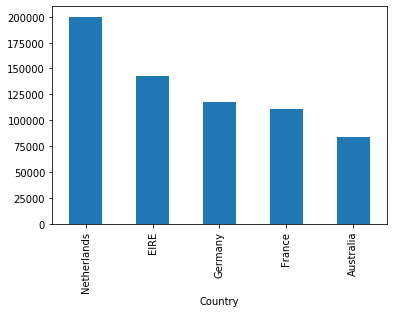

In [334]:
df = online_rt[online_rt.Country!='United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False)[:5]
df.plot(kind='bar')

### Step 5.  Exclude negative Quatity entries

In [335]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.shape

(531285, 8)

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

##### Step 7.3.3 Plot

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

##### Step 7.4.2 Zoom in so we can see that curve more clearly

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

#### 8.3 Plot.

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

### BONUS: Create your own question and answer it.